In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from imaginglss import DECALS
decals = DECALS('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2.conf.py')

In [3]:
from imaginglss.utils import mpl_aea
reload(mpl_aea)

<module 'imaginglss.utils.mpl_aea' from '/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/mpl_aea.pyc'>

In [4]:
import h5py
import kdcount

In [5]:
from kdcount import sphere
from kdcount import correlate
reload(correlate)
reload(sphere)

<module 'kdcount.sphere' from '/global/homes/y/yfeng1/.local/lib/python2.7/site-packages/kdcount/sphere.pyc'>

In [6]:
CDR_LRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_LRG.hdf5', 'r')
CDR_LRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_LRG-RANDOM.hdf5', 'r')

In [7]:
LSS_LRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_LRG.hdf5', 'r')
LSS_LRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_LRG-RANDOM.hdf5', 'r')

In [8]:
LRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LRG.hdf5', 'r')
LRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LRG-RANDOM.hdf5', 'r')

In [9]:
ELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/ELG.hdf5', 'r')
ELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/ELG-RANDOM.hdf5', 'r')

In [10]:
CDR_ELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_ELG.hdf5', 'r')
CDR_ELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_ELG-RANDOM.hdf5', 'r')

In [11]:
LSS_ELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_ELG.hdf5', 'r')
LSS_ELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_ELG-RANDOM.hdf5', 'r')

In [12]:
QSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/QSO.hdf5', 'r')
QSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/QSO-RANDOM.hdf5', 'r')

In [13]:
CDR_QSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_QSO.hdf5', 'r')
CDR_QSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_QSO-RANDOM.hdf5', 'r')

In [14]:
LSS_QSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_QSO.hdf5', 'r')
LSS_QSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LSS_QSO-RANDOM.hdf5', 'r')

In [15]:
from imaginglss.model.dataproduct import bands

In [16]:
print bands

{'Y': 5, 'W4': 9, 'r': 2, 'u': 0, 'W1': 6, 'g': 1, 'i': 3, 'W3': 8, 'z': 4, 'W2': 7}


In [52]:
def readdata(h5file, completeness, subsample):
    RA = h5file['RA'][:]
    DEC = h5file['DEC'][:]
    FC = h5file['COMPLETENESS'][:]
    v = h5file['TYCHO_VETO']['BOSS_DR9'][:]
    
    mask = ~v & (FC >= completeness)
#    if 'CONFIDENCE' in h5file:
#        CONFIDENCE = h5file['CONFIDENCE'][:]
#        mask &= CONFIDENCE[:, 1] > 5
#        mask &= CONFIDENCE[:, 2] > 5
#        mask &= CONFIDENCE[:, 4] > 3
    print len(RA), mask.sum()
    print nanmin(22.5 - 2.5 * log10(3 * h5file['INTRINSIC_NOISELEVEL'][:, 2][mask]))
    print nanmin(22.5 - 2.5 * log10(3 * h5file['INTRINSIC_NOISELEVEL'][:, 2]))
    return RA[mask][::subsample], DEC[mask][::subsample]

def acorr(data, random, completeness, subsample):
    data = readdata(data, completeness, subsample)
    random = readdata(random, completeness, subsample)
    
    data = sphere.points(data[0], data[1])
    random = sphere.points(random[0], random[1])
    abin = sphere.AngularBinning(logspace(-3, 0, 16, endpoint=True))
    print len(data), len(random)
    
    DD = correlate.paircount(data, data, abin, np=8)
    DR = correlate.paircount(data, random, abin, np=8)
    RR = correlate.paircount(random, random, abin, np=8)
    
    r =  1. * len(data) / len(random)
    return abin, 1.0 * DD.sum1, 1.0 * DR.sum1 * r, 1.0 * RR.sum1 * (r * r)

In [53]:
print readdata(LSS_QSO, 1, 1)

738222 666826
23.3046454088
-inf
(array([ 354.86732401,  354.78666713,  354.85074033, ...,  141.91069773,
        141.87000627,  141.87193209]), array([-0.12440392, -0.11047342, -0.10007411, ...,  7.01865182,
        7.01937541,  7.09722887]))


In [54]:
print readdata(QSO, 1, 1)

852123 752789
23.5546289414
-inf
(array([ 354.86732401,  354.78666713,  354.85074033, ...,  141.90837627,
        141.87193209,  141.87072541]), array([-0.12440392, -0.11047342, -0.10007411, ...,  7.04258183,
        7.09722887,  7.11407437]))


# Martin's simulation, copied from email

In [19]:
xi_LRGsim = numpy.fromstring(
""" 0.0059      1.3333128      1.3339293      0.0066935
    0.0082      0.7937082      0.7941341      0.0063048
    0.0114      0.5210123      0.5213102      0.0046585
    0.0159      0.3251247      0.3249088      0.0028975
    0.0222      0.1872699      0.1874814      0.0025432
    0.0309      0.1099219      0.1098727      0.0013177
    0.0430      0.0710673      0.0711660      0.0010544
    0.0599      0.0553864      0.0553852      0.0007638
    0.0834      0.0449320      0.0449386      0.0005066
    0.1162      0.0374823      0.0375749      0.0006080
    0.1618      0.0302715      0.0302595      0.0004080
    0.2253      0.0231022      0.0230803      0.0004153
    0.3138      0.0166624      0.0166872      0.0003718
    0.4370      0.0117605      0.0117686      0.0002519
    0.6085      0.0077813      0.0077688      0.0002083
    0.8474      0.0045778      0.0045572      0.0001926
""", sep=' ').reshape(-1, 4).T

In [20]:
xi_ELGsim = numpy.fromstring(
""" 0.0059      0.0618821      0.0619034      0.0010241
    0.0082      0.0255468      0.0256541      0.0010897
    0.0114      0.0194393      0.0194185      0.0004137
    0.0159      0.0168435      0.0168256      0.0005362
    0.0222      0.0170369      0.0170354      0.0003401
    0.0309      0.0178402      0.0178283      0.0002898
    0.0430      0.0169437      0.0169424      0.0001548
    0.0599      0.0146951      0.0146951      0.0001200
    0.0834      0.0118795      0.0118697      0.0000833
    0.1162      0.0093799      0.0093856      0.0000966
    0.1618      0.0069754      0.0069720      0.0000785
    0.2253      0.0049743      0.0049652      0.0000645
    0.3138      0.0034435      0.0034394      0.0000554
    0.4370      0.0021931      0.0021899      0.0000463
    0.6085      0.0012434      0.0012403      0.0000511
    0.8474      0.0006279      0.0006284      0.0000397
""", sep=' ').reshape(-1, 4).T

In [21]:
xi_QSOsim = numpy.fromstring(
""" 0.0059      0.0172651      0.0173093      0.0058842
    0.0082     -0.0000735      0.0005288      0.0084870
    0.0114      0.0090166      0.0097537      0.0057657
    0.0159      0.0123315      0.0121035      0.0037471
    0.0222      0.0119125      0.0122433      0.0033194
    0.0309      0.0095169      0.0093196      0.0022516
    0.0430      0.0102863      0.0105746      0.0015901
    0.0599      0.0099424      0.0098718      0.0009474
    0.0834      0.0074437      0.0074153      0.0008298
    0.1162      0.0055929      0.0057222      0.0007914
    0.1618      0.0043447      0.0043344      0.0003325
    0.2253      0.0028906      0.0028863      0.0002219
    0.3138      0.0018112      0.0018252      0.0002027
    0.4370      0.0012336      0.0012337      0.0001401
    0.6085      0.0004966      0.0004931      0.0001145
    0.8474      0.0002425      0.0002461      0.0000798
""", sep=' ').reshape(-1, 4).T

# Correlation functions from data

In [22]:
abin, CDR_LRG_DD, CDR_LRG_DR, CDR_LRG_RR = acorr(CDR_LRG, CDR_LRGR, 1.0, 1)

21.0660038855
-inf
21.1136861845
-inf
539217 2948485


In [23]:
abin, LSS_LRG_DD, LSS_LRG_DR, LSS_LRG_RR = acorr(LSS_LRG, LSS_LRGR, 1.0, 1)

21.1011961033
-inf
21.1136861845
-inf
405557 3035802


In [24]:
abin, LRG_DD, LRG_DR, LRG_RR = acorr(LRG, LRGR, 1.0, 1)

21.1011961033
-inf
21.1136861845
-inf
664576 3035802


[]

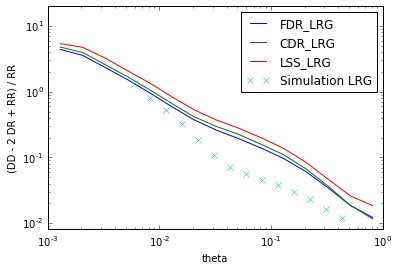

In [25]:
plot(abin.angular_centers, (LRG_DD - 2 * LRG_DR + LRG_RR) / LRG_RR, label='FDR_LRG')
plot(abin.angular_centers, (CDR_LRG_DD - 2 * CDR_LRG_DR + CDR_LRG_RR) / CDR_LRG_RR, label='CDR_LRG')
plot(abin.angular_centers, (LSS_LRG_DD - 2 * LSS_LRG_DR + LSS_LRG_RR) / LSS_LRG_RR, label='LSS_LRG')
plot(xi_LRGsim[0], xi_LRGsim[1], 'x', label='Simulation LRG')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend()
ylim(8e-3, 20)
loglog()

In [26]:
abin, ELG_DD, ELG_DR, ELG_RR = acorr(ELG, ELGR, 1.0, 1)

21.1188687962
-inf
21.5834393167
-inf
2613060 1966257


In [27]:
abin, CDR_ELG_DD, CDR_ELG_DR, CDR_ELG_RR = acorr(CDR_ELG, CDR_ELGR, 1.0, 1)

23.099608746
-inf
23.0996124559
-inf
694838 1098701


In [28]:
abin, LSS_ELG_DD, LSS_ELG_DR, LSS_ELG_RR = acorr(LSS_ELG, LSS_ELGR, 1.0, 1)

21.1188687962
-inf
21.1136861845
-inf
2408861 2650562


[]

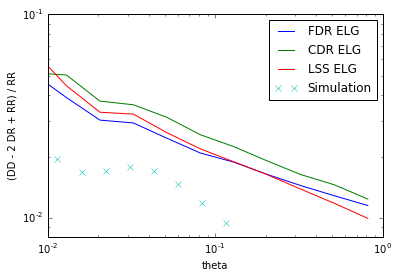

In [29]:
plot(abin.angular_centers, (ELG_DD - 2 * ELG_DR + ELG_RR) / ELG_RR, label='FDR ELG')
plot(abin.angular_centers, (CDR_ELG_DD - 2 * CDR_ELG_DR + CDR_ELG_RR) / CDR_ELG_RR, label='CDR ELG')
plot(abin.angular_centers, (LSS_ELG_DD - 2 * LSS_ELG_DR + LSS_ELG_RR) / LSS_ELG_RR, label='LSS ELG')
plot(xi_ELGsim[0], xi_ELGsim[1], 'x', label='Simulation')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend()
xlim(1e-2, 1)
ylim(8e-3, 0.1)
loglog()

In [30]:
abin, CDR_QSO_DD, CDR_QSO_DR, CDR_QSO_RR = acorr(CDR_QSO, CDR_QSOR, 1.0, 1)

23.297786215
-inf
23.2977843934
-inf
442971 854208


In [31]:
abin, QSO_DD, QSO_DR, QSO_RR = acorr(QSO, QSOR, 1.0, 1)

21.5628009931
-inf
21.1136861845
-inf
752789 2745167


In [32]:
abin, LSS_QSO_DD, LSS_QSO_DR, LSS_QSO_RR = acorr(LSS_QSO, LSS_QSOR, 1.0, 1)

21.5628009931
-inf
21.1136861845
-inf
666826 2800593


[]

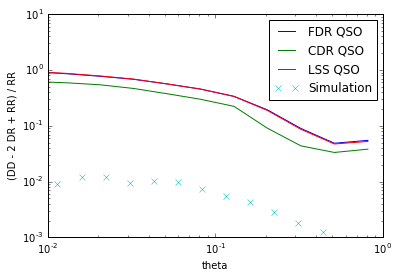

In [33]:
plot(abin.angular_centers, (QSO_DD - 2 * QSO_DR + QSO_RR) / QSO_RR, label='FDR QSO')
plot(abin.angular_centers, (CDR_QSO_DD - 2 * CDR_QSO_DR + CDR_QSO_RR) / CDR_QSO_RR, label='CDR QSO')
plot(abin.angular_centers, (LSS_QSO_DD - 2 * LSS_QSO_DR + LSS_QSO_RR) / LSS_QSO_RR, label='LSS QSO')
plot(xi_QSOsim[0], xi_QSOsim[1], 'x', label='Simulation')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
xlim(1e-2, 1)
ylim(1e-3, 10)
legend()
loglog()

# Now look at the spatial distribution of randoms and objects
See if this can explain the weird correlation functions we see.

In [34]:
reload(mpl_aea)

<module 'imaginglss.utils.mpl_aea' from '/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/mpl_aea.pyc'>

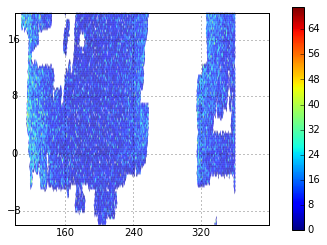

In [35]:
ax = subplot(111, projection='aea')
ra, dec = ELGR['RA'][::1], ELGR['DEC'][::1]
v = ELGR['TYCHO_VETO']['BOSS_DR9'][:]
#_ = hist2d(ra, dec, bins=(200, 200)
ax.histmap(ra[v], dec[v], perarea=False, nside=128, range=((100, 400), (-10, 20)), vmin=0)
ax.set_xlim(100, 400)
ax.set_ylim(-10, 20)
ax.set_parallels(-20, 20)
ax.grid()
colorbar()

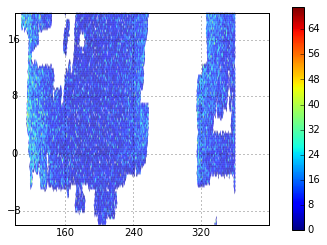

In [36]:
ax = subplot(111, projection='aea')
ra, dec = ELGR['RA'][::1], ELGR['DEC'][::1]
v = ELGR['TYCHO_VETO']['BOSS_DR9'][:]
#_ = hist2d(ra, dec, bins=(200, 200)
ax.histmap(ra[v], dec[v], perarea=False, nside=128, range=((100, 400), (-10, 20)), vmin=0)
ax.set_xlim(100, 400)
ax.set_ylim(-10, 20)
ax.set_parallels(-20, 20)
ax.grid()
colorbar()

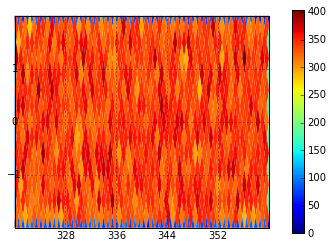

In [37]:
ax = subplot(111, projection='aea')
ra, dec = LSS_ELGR['RA'][::1], LSS_ELGR['DEC'][::1]
v = LSS_ELGR['COMPLETENESS'][:] >= 0
#_ = hist2d(ra, dec, bins=(200, 200)
ax.histmap(ra[v], dec[v], perarea=False, nside=128, range=((320, 360), (-2, 2)), vmin=0)
ax.set_xlim(320, 360)
ax.set_ylim(-2, 2)
ax.set_parallels(-20, 20)
ax.grid()
colorbar()

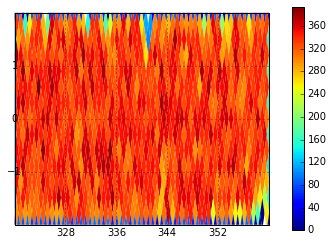

In [38]:
ax = subplot(111, projection='aea')
ra, dec = LSS_ELGR['RA'][::1], LSS_ELGR['DEC'][::1]
v = LSS_ELGR['COMPLETENESS'][:] ==1
#_ = hist2d(ra, dec, bins=(200, 200)
ax.histmap(ra[v], dec[v], perarea=False, nside=128, range=((320, 360), (-2, 2)), vmin=0)
ax.set_xlim(320, 360)
ax.set_ylim(-2, 2)
ax.set_parallels(-20, 20)
ax.grid()
colorbar()

In [39]:
def number_density(ax, cat):
    ra, dec = readdata(cat, 1.0, 1.0)
    #_ = hist2d(ra, dec, bins=(200, 200)
    ax.histmap(ra, dec, perarea=True, nside=64)
    ax.set_xlim(100, 400)
    ax.set_ylim(-10, 45)
    ax.set_parallels(-20, 20)
    ax.grid()

21.1136861845
-inf
21.1136861845
-inf
23.2977843934
-inf
21.5628009931
-inf
21.5628009931
-inf
23.297786215
-inf


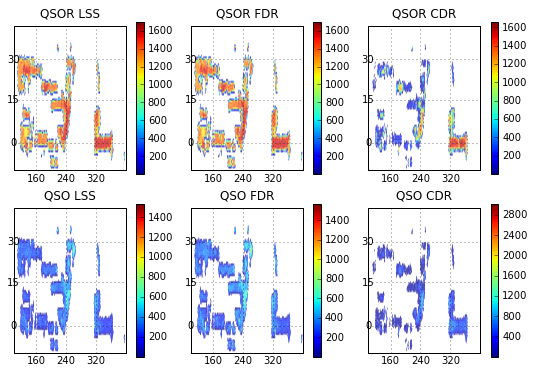

In [40]:
figure(figsize=(9, 6))
ax = subplot(231, projection='aea')
number_density(ax, LSS_QSOR)
colorbar()
ax.set_title('QSOR LSS')
ax = subplot(232, projection='aea')
number_density(ax, QSOR)
colorbar()
ax.set_title('QSOR FDR')
ax = subplot(233, projection='aea')
number_density(ax, CDR_QSOR)
colorbar()
ax.set_title('QSOR CDR')
ax = subplot(234, projection='aea')
number_density(ax, LSS_QSO)
ax.set_title('QSO LSS')
colorbar()
ax = subplot(235, projection='aea')
number_density(ax, QSO)
ax.set_title('QSO FDR')
colorbar()
ax = subplot(236, projection='aea')
number_density(ax, CDR_QSO)
ax.set_title('QSO CDR')
colorbar()

21.1136861845
-inf
21.1136861845
-inf
21.1136861845
-inf
21.1011961033
-inf
21.1011961033
-inf
21.0660038855
-inf


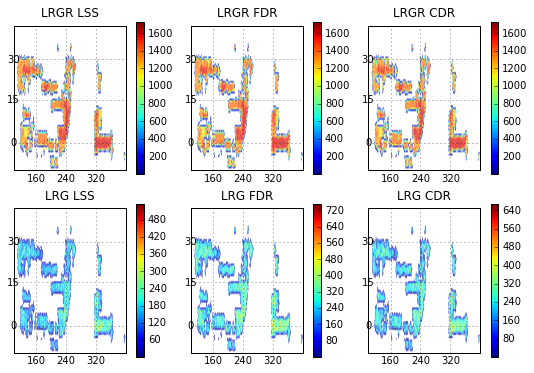

In [41]:
figure(figsize=(9, 6))
ax = subplot(231, projection='aea')
number_density(ax, LSS_LRGR)
colorbar()
ax.set_title('LRGR LSS')
ax = subplot(232, projection='aea')
number_density(ax, LRGR)
colorbar()
ax.set_title('LRGR FDR')
ax = subplot(233, projection='aea')
number_density(ax, CDR_LRGR)
colorbar()
ax.set_title('LRGR CDR')
ax = subplot(234, projection='aea')
number_density(ax, LSS_LRG)
ax.set_title('LRG LSS')
colorbar()
ax = subplot(235, projection='aea')
number_density(ax, LRG)
ax.set_title('LRG FDR')
colorbar()
ax = subplot(236, projection='aea')
number_density(ax, CDR_LRG)
ax.set_title('LRG CDR')
colorbar()

21.1136861845
-inf
21.5834393167
-inf
23.0996124559
-inf
21.1188687962
-inf
21.1188687962
-inf
23.099608746
-inf


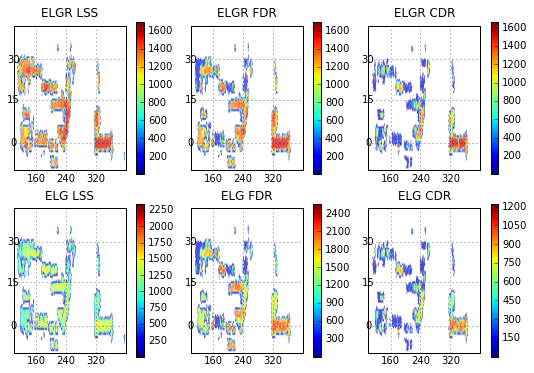

In [42]:
figure(figsize=(9, 6))
ax = subplot(231, projection='aea')
number_density(ax, LSS_ELGR)
colorbar()
ax.set_title('ELGR LSS')
ax = subplot(232, projection='aea')
number_density(ax, ELGR)
colorbar()
ax.set_title('ELGR FDR')
ax = subplot(233, projection='aea')
number_density(ax, CDR_ELGR)
colorbar()
ax.set_title('ELGR CDR')
ax = subplot(234, projection='aea')
number_density(ax, LSS_ELG)
ax.set_title('ELG LSS')
colorbar()
ax = subplot(235, projection='aea')
number_density(ax, ELG)
ax.set_title('ELG FDR')
colorbar()
ax = subplot(236, projection='aea')
number_density(ax, CDR_ELG)
ax.set_title('ELG CDR')
colorbar()

# This Section compares with Martin's correlation function
# This also shows for LRG the star veto is not doing much

In [43]:
RAd, DECd = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG_d.rdz', usecols=(0,1), unpack=True)

In [44]:
RAr, DECr = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG_r.rdz', usecols=(0,1), unpack=True)

In [45]:
data = sphere.points(RAd, DECd)
random = sphere.points(RAr, DECr)
abin = sphere.AngularBinning(logspace(-3, 0, 16, endpoint=True))
print len(data), len(random)

DD = correlate.paircount(data, data, abin, np=8)
DR = correlate.paircount(data, random, abin, np=8)
RR = correlate.paircount(random, random, abin, np=8)

572573 1793492


In [46]:
!cat /global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG.wt

# MPI w(theta)-LS code running on 32 processes.
# Read    1793492 objects in 0.000<z<9.000 from LRG_r.rdz
# Read     572573 objects in 0.000<z<9.000 from LRG_d.rdz
# Read     572573 objects in 0.000<z<9.000 from LRG_d.rdz
# Reading and partitioning took 8.13 sec.
# Raw random load: [54496,57598].
# Raw random total count: 1793492
# Will count RR with random stride 1
# Using 32 pixels for bootstrap.
# Pixelizing took 0.26 sec.
# Using 32 pixels (528 pairs).
# After padding random load: [64327,98967].
# Tree has 225008 nodes.
# Memory load is 32.62 MB (excluding lists).
# Longest list length is 83
# Occurs for node of size 0.00
# Total cumulative list length is 361801
# Minimum node size is 1.12e-06 (min_node_size=1.00e-05).
# Pair calculation took 40.28 sec.
# Total run time 48.45 sec.
#  th(deg)          w(th)            Avg            Std
    0.0059        1.72780        1.71128        0.09555
    0.0082        1.14968        1.13562        0.09227
    0.0114        0.83225        0.8

[]

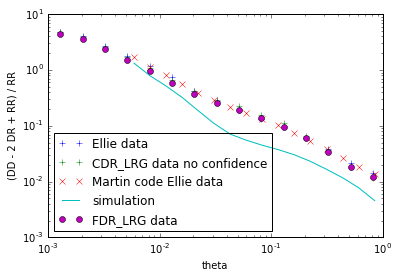

In [47]:
r = 1.0 * len(data) / len(random)
plot(abin.angular_centers, 
     (1.0 * DD.sum1 - 2 * r * DR.sum1 + r ** 2 * RR.sum1) / (r ** 2 * RR.sum1), 
     '+',
     label='Ellie data')
plot(abin.angular_centers, 
     (CDR_LRG_DD - 2 * CDR_LRG_DR + CDR_LRG_RR) / CDR_LRG_RR, 
     '+',
     label='CDR_LRG data no confidence', 
     )
r, w = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG.wt', usecols=(0, 1), unpack=True)

plot(r, w, 'x', label='Martin code Ellie data')
plot(xi_LRGsim[0], xi_LRGsim[1], label='simulation')

plot(abin.angular_centers, (LRG_DD - 2 * LRG_DR + LRG_RR) / LRG_RR, 'o', label='FDR_LRG data')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend(loc='lower left')
loglog()

572573


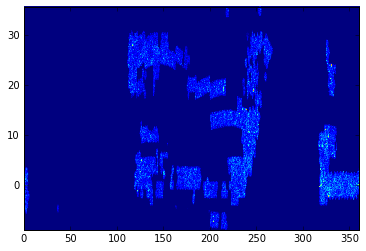

In [48]:
_ = hist2d(RAd, DECd, bins=(400, 400))
print len(RAd)

539217


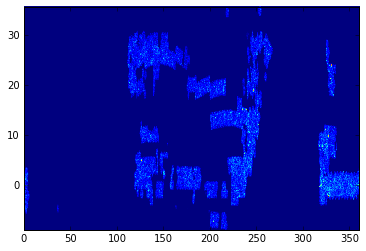

In [188]:
RA_CDR_LRGd, DEC_CDR_LRGd = readdata(CDR_LRG, 1, 1)
print len(RA_CDR_LRGd)
_ = hist2d(RA_CDR_LRGd, DEC_CDR_LRGd, bins=(400, 400))

2948485


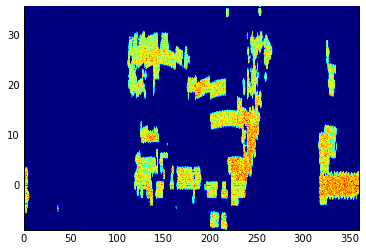

In [187]:
RA_CDR_LRGr, DEC_CDR_LRGr = readdata(CDR_LRGR, 1, 1)
print len(RA_CDR_LRGr)
_ = hist2d(RA_CDR_LRGr, DEC_CDR_LRGr, bins=(400, 400))

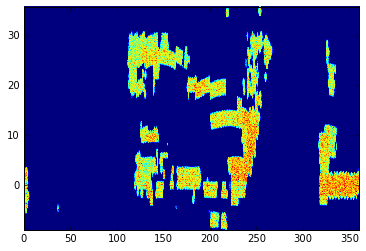

In [175]:
_ = hist2d(RAr, DECr, bins=(400, 400))

[]

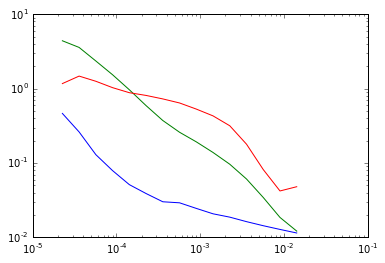

In [59]:
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/ELG-wtheta.txt', unpack=True)
plot(t, w)
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/LRG-wtheta.txt', unpack=True)
plot(t, w)
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/QSO-wtheta.txt', unpack=True)
plot(t, w)

loglog()


[]

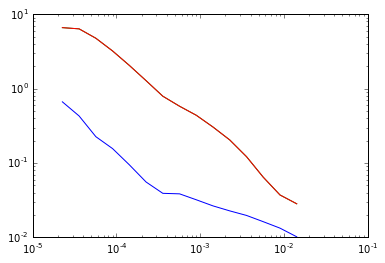

In [64]:
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_ELG-wtheta.txt', unpack=True)
plot(t, w)
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_LRG-wtheta.txt', unpack=True)
plot(t, w)
#t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_QSO-wtheta.txt', unpack=True)
plot(t, w)

loglog()


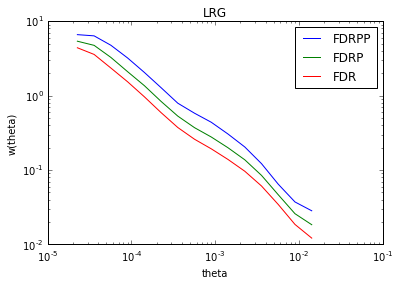

In [77]:
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_LRG-wtheta.txt', unpack=True)
plot(t, w, label='FDRPP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRP_LRG-wtheta.txt', unpack=True)
plot(t, w, label='FDRP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/LRG-wtheta.txt', unpack=True)
plot(t, w, label='FDR')
loglog()
title('LRG')
legend()
xlabel('theta')
ylabel('w(theta)')

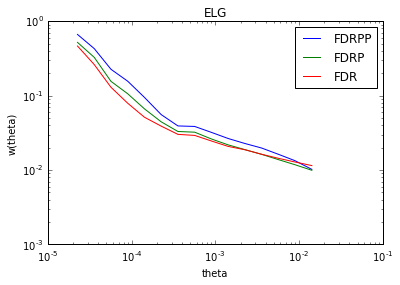

In [78]:
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_ELG-wtheta.txt', unpack=True)
plot(t, w, label='FDRPP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRP_ELG-wtheta.txt', unpack=True)
plot(t, w, label='FDRP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/ELG-wtheta.txt', unpack=True)
plot(t, w, label='FDR')
loglog()
title('ELG')
legend()
xlabel('theta')
ylabel('w(theta)')

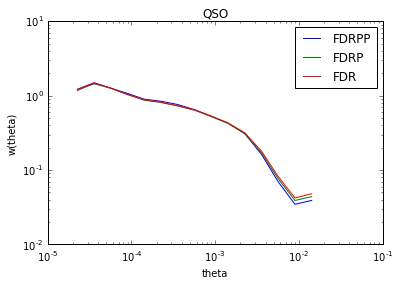

In [79]:
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRPP_QSO-wtheta.txt', unpack=True)
plot(t, w, label='FDRPP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/FDRP_QSO-wtheta.txt', unpack=True)
plot(t, w, label='FDRP')
t, w= loadtxt('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2lss/QSO-wtheta.txt', unpack=True)
plot(t, w, label='FDR')
loglog()
title('QSO')
legend()
xlabel('theta')
ylabel('w(theta)')